In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Pratik Asarkar\\GreatLearning\\Practice\\Machine Learning - Classification')

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df = df.sample(frac = 1,random_state = 3)

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [4]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

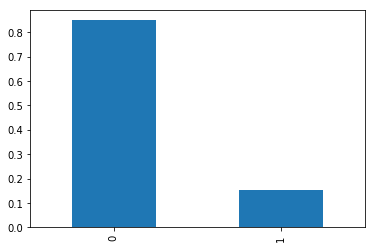

In [5]:
df['TenYearCHD'].value_counts(normalize = True).plot(kind = 'bar')

In [6]:
ms = df.isnull().sum()
ms[ms > 0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [7]:
# df['glucose'].describe()

In [8]:
# df['glucose'].plot(kind = 'density')

In [9]:
# df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [10]:
# df['glucose'].plot(kind = 'density')

In [11]:
# df['glucose'].describe()

In [12]:
df = df.fillna(method = 'ffill')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 3546 to 1688
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


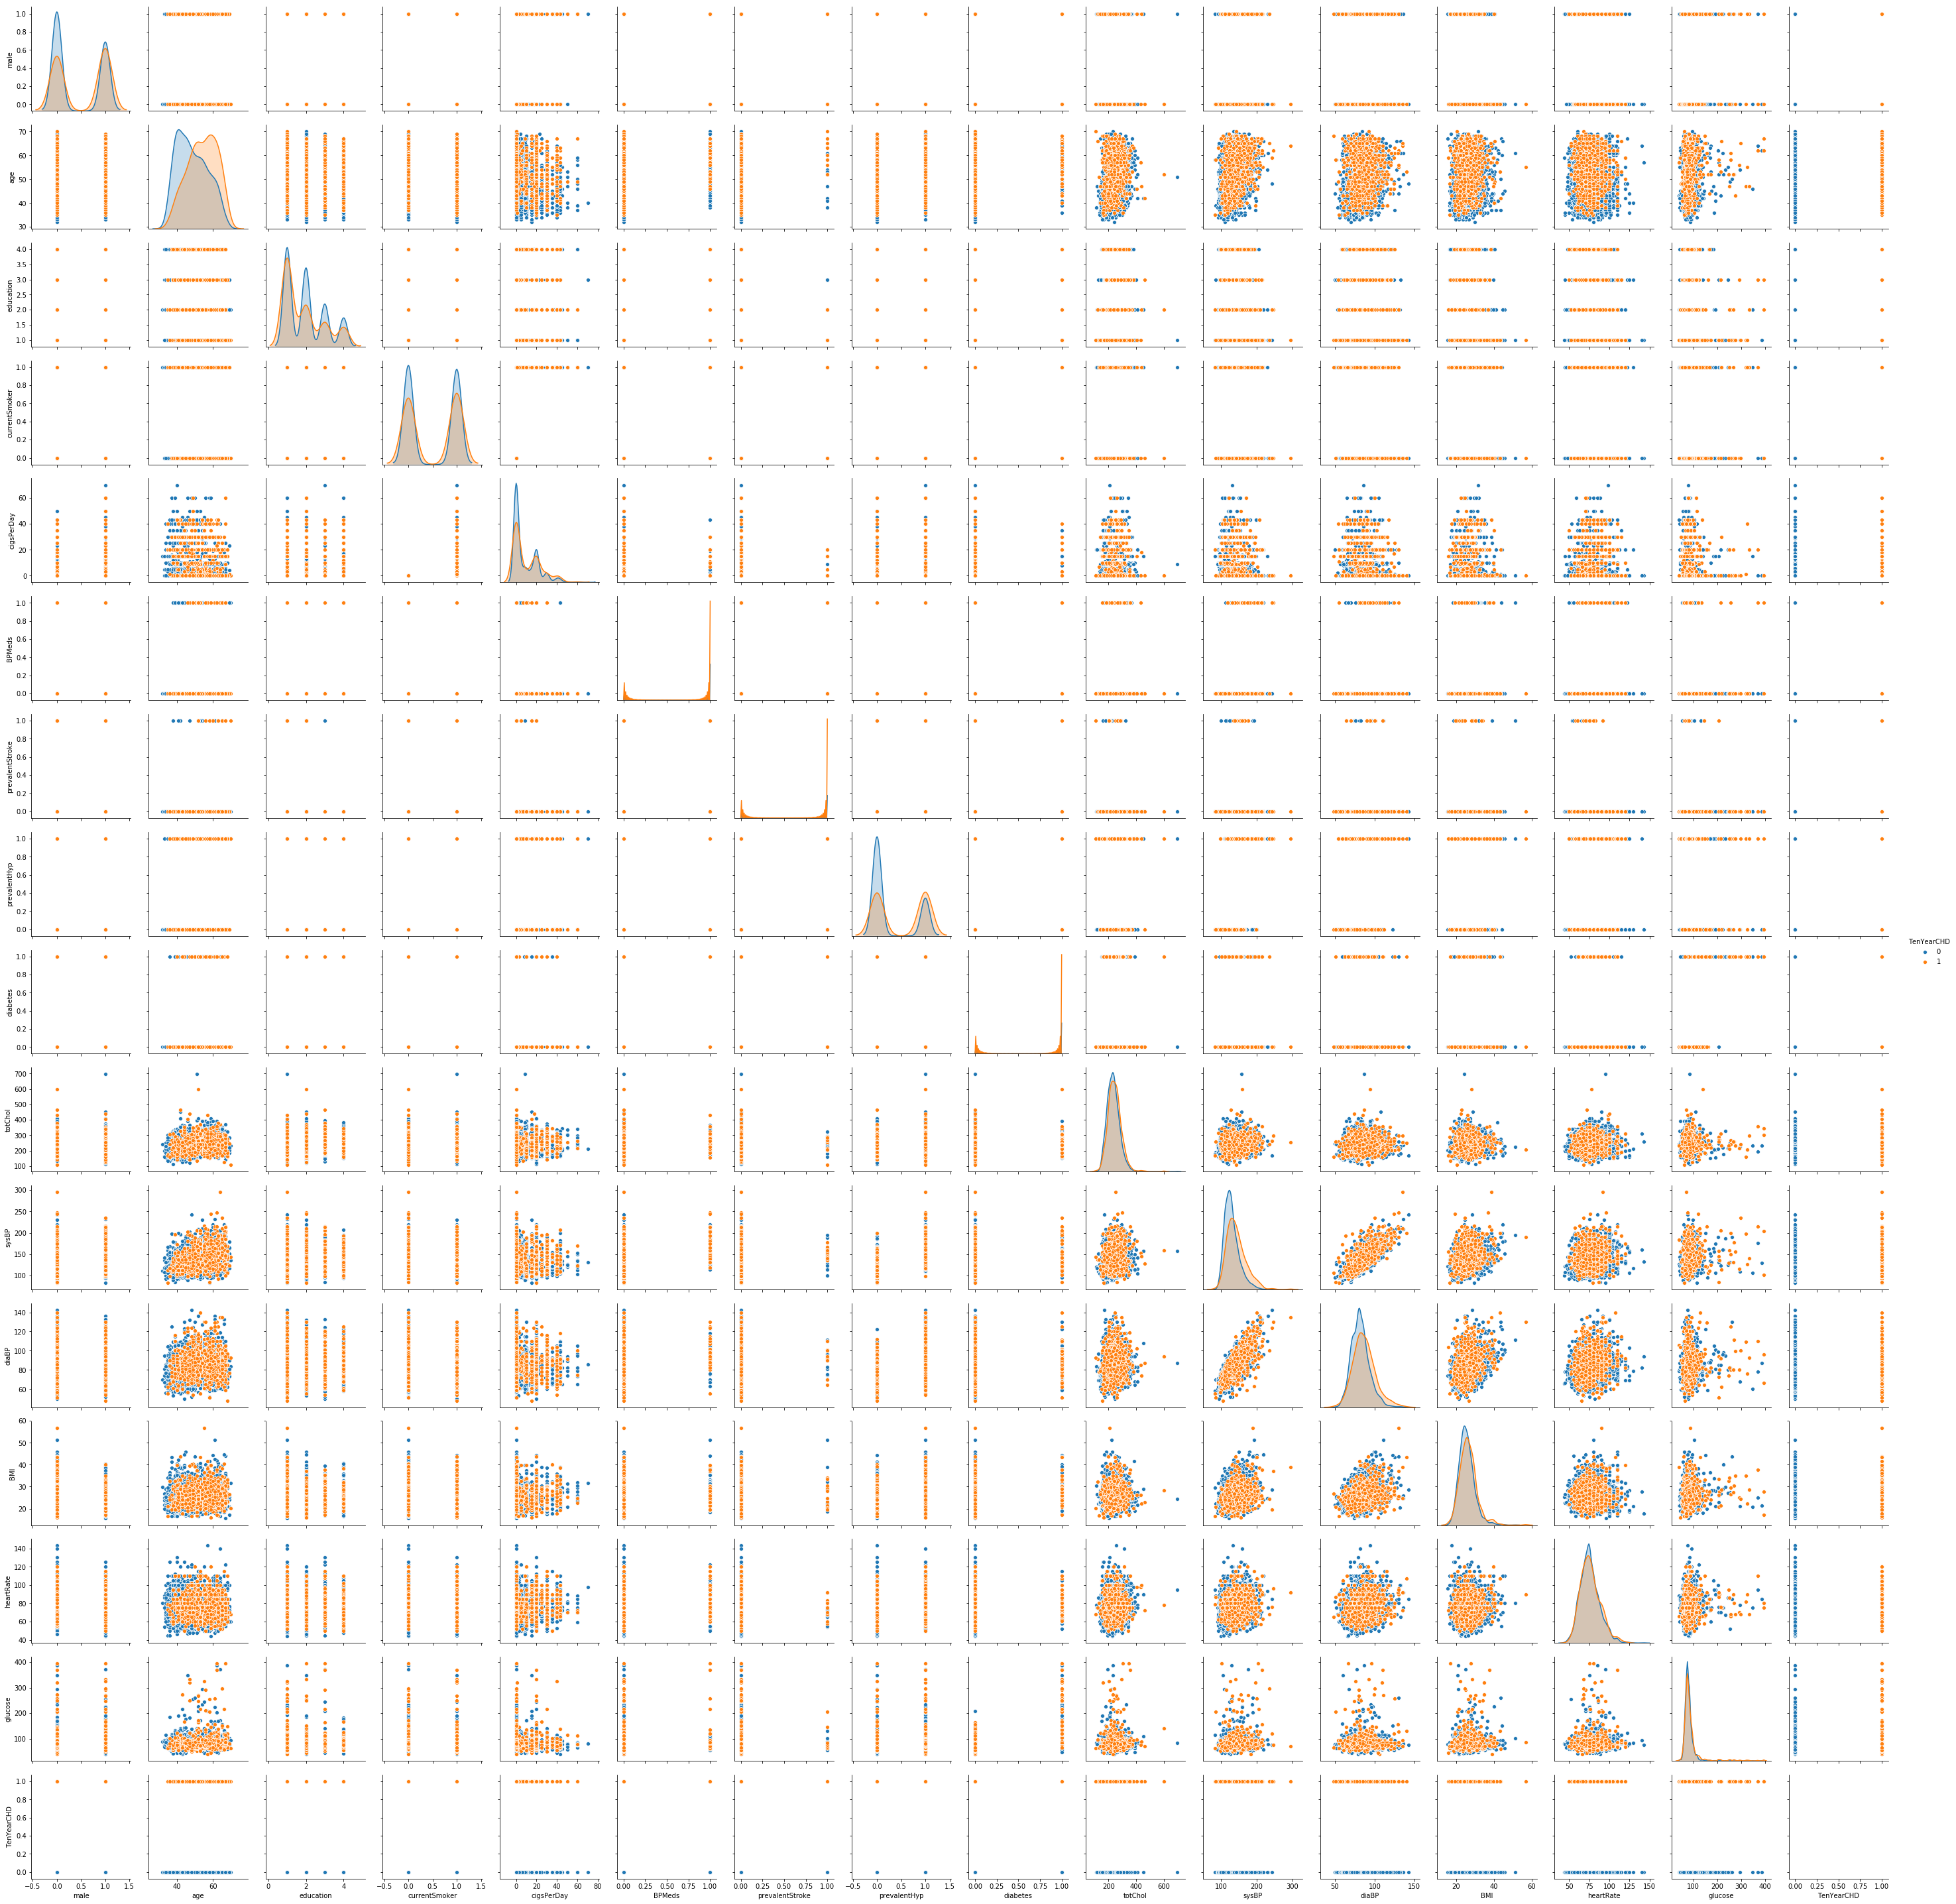

In [14]:
sns.pairplot(df,hue ='TenYearCHD' )

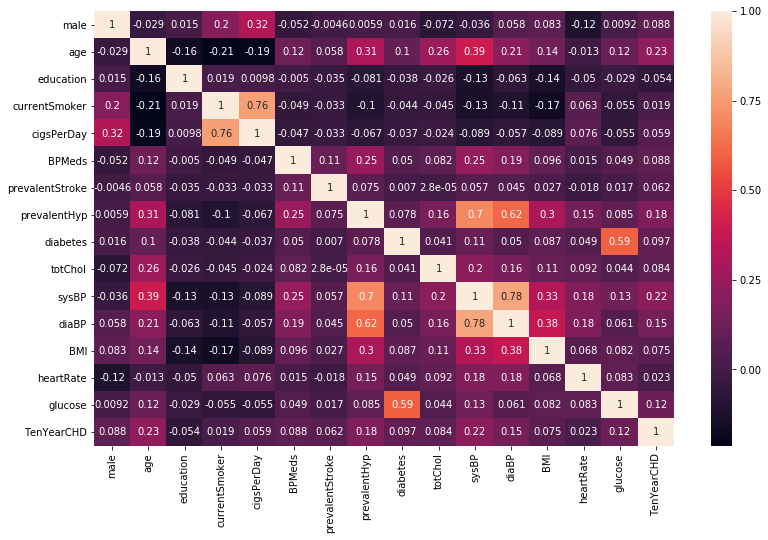

In [15]:
plt.figure(figsize = (13,8))
sns.heatmap(df.corr(),annot = True)

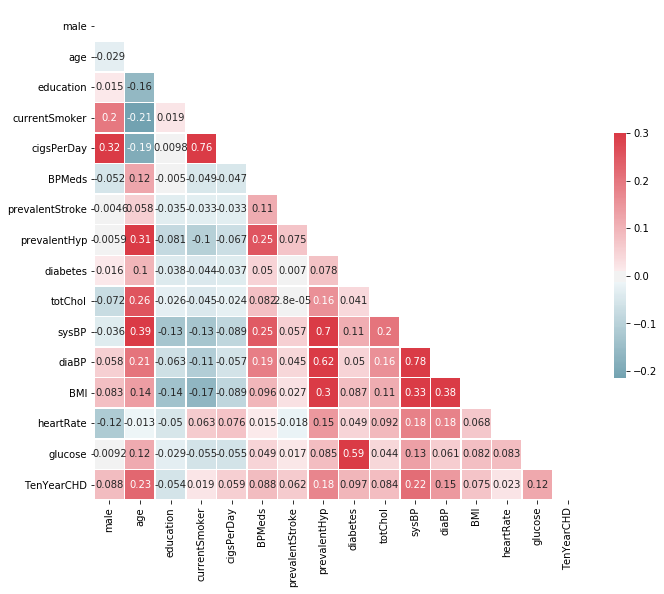

In [16]:
import plusmodules as pm
pm.corr_matrix(df)

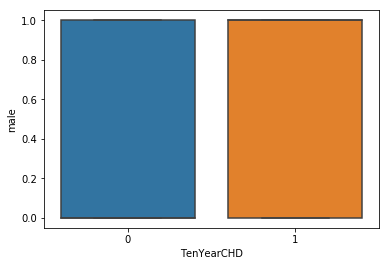

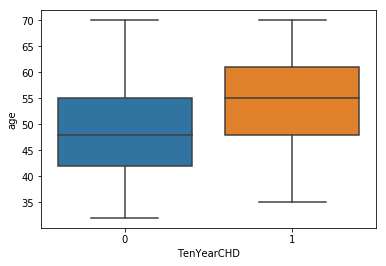

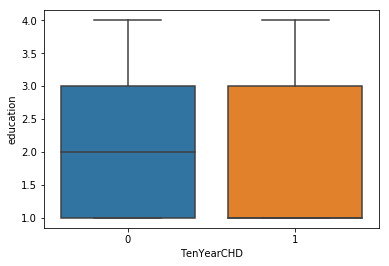

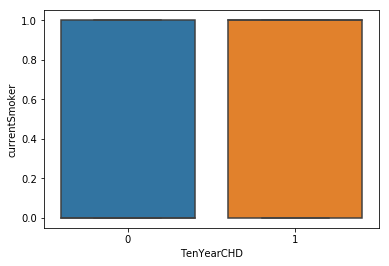

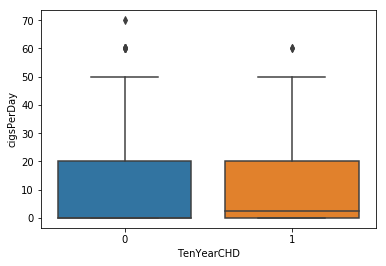

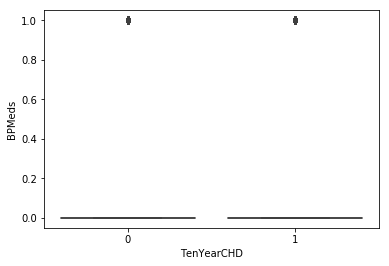

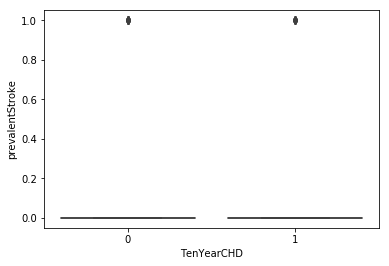

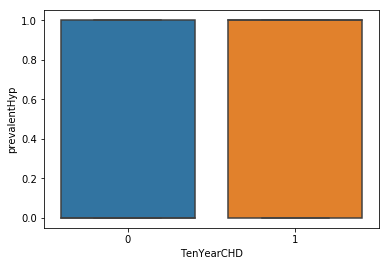

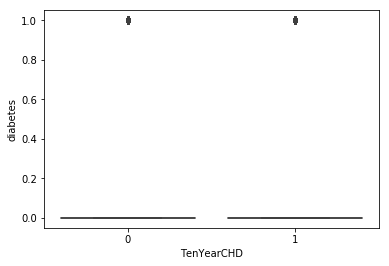

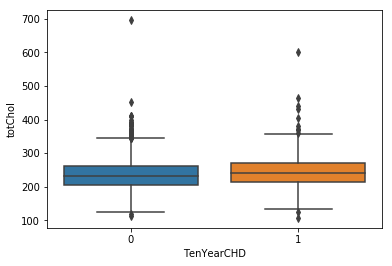

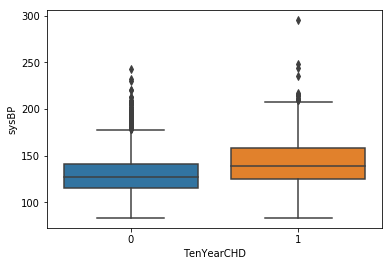

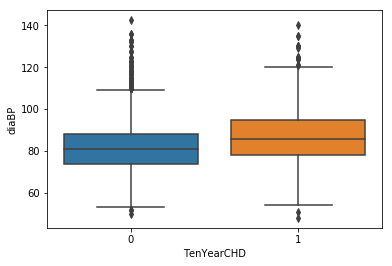

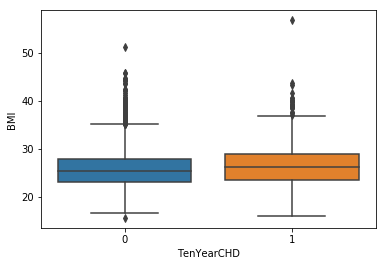

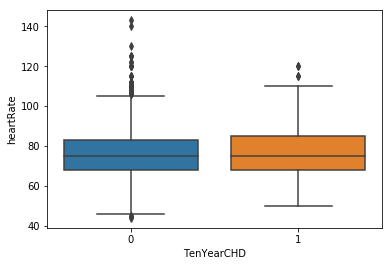

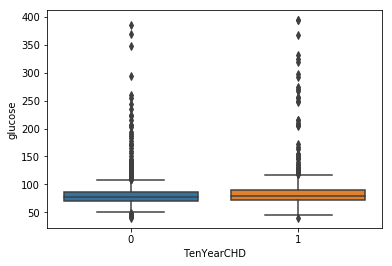

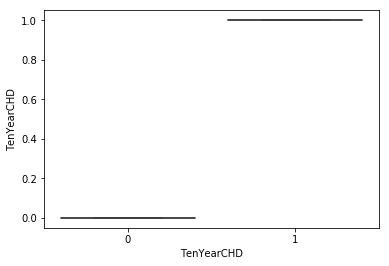

In [17]:
cols = list(df.columns)
for col in cols:
    sns.boxplot(y = col,data = df, x = 'TenYearCHD')
    plt.show()

In [18]:
df0 = df[df['TenYearCHD'] == 0]
df1 = df[df['TenYearCHD'] == 1]

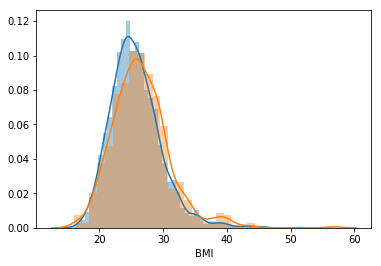

In [19]:
sns.distplot(df0['BMI'])
sns.distplot(df1['BMI'])
plt.show()

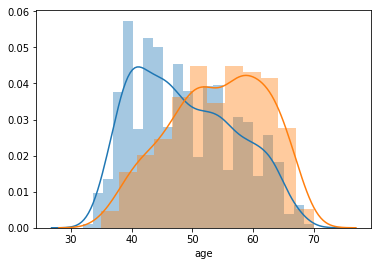

In [20]:
sns.distplot(df0['age'])
sns.distplot(df1['age'])
plt.show()

In [21]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis = 1)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [23]:
X_const = sm.add_constant(X)
vif = [variance_inflation_factor(X_const.values,i) for i in range(X_const.shape[1])]    
pd.DataFrame(vif,index = X_const.columns,columns=['vif'])

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,vif
const,197.703826
male,1.197415
age,1.368623
education,1.052772
currentSmoker,2.490359
cigsPerDay,2.618425
BPMeds,1.097285
prevalentStroke,1.018798
prevalentHyp,2.050602
diabetes,1.551588


##### Building Logistic Regression Model

In [24]:
model = sm.Logit(y,X_const,random_state = 3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378369
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.1117
Time:                        10:24:50   Log-Likelihood:                -1604.3
converged:                       True   LL-Null:                       -1806.1
                                        LLR p-value:                 1.189e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1133      0.664    -12.224      0.000      -9.414      -6.812
male                0.5068      0.101      5.043      0.000       0.310       0.704
age                 0.0619      0.006      9.960      0.000       0.050       0.074
education          -0.0168      0.046     -0.368      0.713      -0.106       0.072
currentSmoker       0.0136      0.144      0.094      0.925      -0.268       0.295
cigsPerDay          0.0212      0.006      3.736      0.000       0.010       0.032
BPMeds              0.2668      0.217      1.227      0.220      -0.160       0.693
prevalentStroke     0.9610      0.442      2.175      0.030       0.095       1.827
prevalentHyp        0.2298      0.128      1.789      0.074      -0.022       0.482
diabetes            0.2171      0.290      0.748      0.454      -0.352       0.786
totChol             0.0021      0.001      2.030      0.042    7.15e-05       0.004
sysBP               0.0141      0.004      3.984      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.492      0.623      -0.015       0.009
BMI                 0.0028      0.012      0.239      0.811      -0.020       0.026
heartRate          -0.0015      0.004     -0.397      0.691      -0.009       0.006
glucose             0.0064      0.002      3.077      0.002       0.002       0.011
===================================================================================
"""

H0 : beta_age = 0

H1 : beta_age != 0

0.000 is the prob of getting abs(beta_age) >= 0.0619 when H0 is true

In [25]:
p = model.pvalues
cols = list(X_const.columns)

while len(cols)>1:
    X_1 = X_const[cols]
    model = sm.Logit(y,X_1,random_state = 3).fit()
    p = model.pvalues
    max_p = max(p)
    feature_maxp = p.idxmax()
    if max_p > 0.05 : 
        print('Column removed : ',feature_maxp)
        print('Prob : ',max_p)
        print()
        cols.remove(feature_maxp)
    else:
        break
        
cols

Optimization terminated successfully.
         Current function value: 0.378369
         Iterations 7
Column removed :  currentSmoker
Prob :  0.9248067145320578

Optimization terminated successfully.
         Current function value: 0.378370
         Iterations 7
Column removed :  BMI
Prob :  0.8183474351558154

Optimization terminated successfully.
         Current function value: 0.378376
         Iterations 7
Column removed :  heartRate
Prob :  0.6936547572101235

Optimization terminated successfully.
         Current function value: 0.378395
         Iterations 7
Column removed :  education
Prob :  0.7021584464005148

Optimization terminated successfully.
         Current function value: 0.378412
         Iterations 7
Column removed :  diaBP
Prob :  0.6177168524266177

Optimization terminated successfully.
         Current function value: 0.378441
         Iterations 7
Column removed :  diabetes
Prob :  0.43001987179443546

Optimization terminated successfully.
         Current fun

['const',
 'male',
 'age',
 'cigsPerDay',
 'prevalentStroke',
 'totChol',
 'sysBP',
 'glucose']

In [26]:
model = sm.Logit(y,X_const[cols],random_state = 3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.379099
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4232
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.1100
Time:                        10:24:50   Log-Likelihood:                -1607.4
converged:                       True   LL-Null:                       -1806.1
                                        LLR p-value:                 8.410e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8484      0.438    -20.220      0.000      -9.706      -7.991
male                0.5096      0.098      5.184      0.000       0.317       0.702
age                 0.0635      0.006     10.632      0.000       0.052       0.075
cigsPerDay          0.0212      0.004      5.510      0.000       0.014       0.029
prevalentStroke     1.0675      0.437      2.443      0.015       0.211       1.924
totChol             0.0021      0.001      2.081      0.037       0.000       0.004
sysBP               0.0167      0.002      8.299      0.000       0.013       0.021
glucose             0.0074      0.002      4.579      0.000       0.004       0.011
===================================================================================
"""

In [27]:
exp_beta = np.exp(model.params)
pd.DataFrame([exp_beta-1,model.params],index=['change in odds','log(odds)'])

,const,male,age,cigsPerDay,prevalentStroke,totChol,sysBP,glucose
change in odds,-0.999856,0.664664,0.065516,0.021378,1.907957,0.002115,0.016827,0.007400
log(odds),-8.848368,0.509623,0.063459,0.021153,1.067451,0.002113,0.016687,0.007373


##### AGE

1. Positive sign of age indicates that the probability of CHD increases with age

2. Increase in age by 1 year will increase the log(odds) of CHD by 0.0635

3. Increase in age by 1 year will increase the odds of CHD by 6.55%

##### MALE

1. Positive sign of male indicates Male gender is more prone to CHD compared to female

2. log(odds) of CHD for males is higher by 0.5096 compared to females

3. odds of CHD for males is higher by 66.46% compared to females

In [28]:
X_prob = X_const[cols]
X_prob['y'] = y.values

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
X_prob

,const,male,age,cigsPerDay,prevalentStroke,totChol,sysBP,glucose,y
3546,1.0,0,54,0.0,0,241.0,106.0,74.0,0
1127,1.0,0,42,10.0,0,253.0,109.0,60.0,0
3088,1.0,0,58,0.0,1,274.0,159.0,81.0,0
437,1.0,1,45,30.0,0,240.0,141.0,76.0,0
3188,1.0,1,63,0.0,0,190.0,148.0,86.0,0
3149,1.0,0,44,9.0,0,190.0,147.5,86.0,1
3601,1.0,0,57,10.0,0,238.0,133.0,115.0,0
1371,1.0,0,55,0.0,0,340.0,140.0,83.0,0
4106,1.0,0,46,7.0,0,282.0,176.0,78.0,0
2157,1.0,1,54,0.0,0,260.0,116.0,61.0,0


In [30]:
X_prob.to_csv('X_prob.csv')

In [31]:
prob = model.predict(X_const[cols])

In [32]:
prob

3546    0.069264
1127    0.040086
3088    0.432654
437     0.193365
3188    0.302438
3149    0.085565
3601    0.190055
1371    0.155549
4106    0.157963
2157    0.121612
836     0.081440
3983    0.069911
2326    0.097457
3060    0.073301
3071    0.041896
2761    0.032800
1536    0.063252
2004    0.040038
3368    0.035749
3423    0.193457
1213    0.068304
1727    0.162968
3938    0.113072
4140    0.162273
3155    0.200088
2424    0.276754
424     0.043976
1291    0.072161
2218    0.111961
1292    0.112308
          ...   
2232    0.069064
1396    0.119339
274     0.073549
704     0.333439
1024    0.053869
383     0.128470
2609    0.158845
3243    0.128401
2567    0.197837
1642    0.052140
858     0.106603
4019    0.208245
3388    0.267300
2306    0.124874
834     0.217042
2710    0.348764
1498    0.068949
3610    0.119392
3576    0.423406
1447    0.154395
2528    0.361376
1705    0.044844
2923    0.109596
2707    0.023856
3069    0.322429
789     0.344482
968     0.120925
1667    0.1714

In [33]:
prob = pd.DataFrame(prob,columns=['prob'])
prob

,prob
3546,0.069264
1127,0.040086
3088,0.432654
437,0.193365
3188,0.302438
3149,0.085565
3601,0.190055
1371,0.155549
4106,0.157963
2157,0.121612


In [34]:
prob['y_est'] = prob['prob'].apply(lambda x : 1 if x >= 0.5 else 0)

In [45]:
prob['y'] = y.values

In [46]:
prob

,prob,y_est,y
3546,0.069264,0,0
1127,0.040086,0,0
3088,0.432654,0,0
437,0.193365,0,0
3188,0.302438,0,0
3149,0.085565,0,1
3601,0.190055,0,0
1371,0.155549,0,0
4106,0.157963,0,0
2157,0.121612,0,0


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,prob['y_est'])

array([[3573,   23],
       [ 595,   49]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [49]:
accuracy_score(y,prob['y_est'])

0.8542452830188679

In [50]:
precision_score(y,prob['y_est'])

0.6805555555555556

In [51]:
recall_score(y,prob['y_est'])

0.07608695652173914

In [52]:
print(classification_report(y,prob['y_est']))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3596
           1       0.68      0.08      0.14       644

    accuracy                           0.85      4240
   macro avg       0.77      0.53      0.53      4240
weighted avg       0.83      0.85      0.80      4240



In [88]:
df0 = prob[prob['y'] == 0]
df1 = prob[prob['y'] == 1]

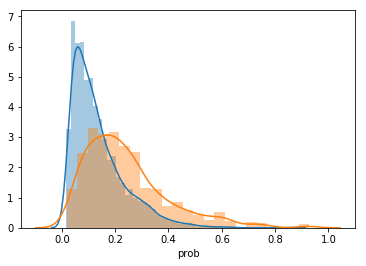

In [89]:
sns.distplot(df0['prob'])
sns.distplot(df1['prob'])
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score,roc_curve

In [66]:
roc_auc_score(y,prob['prob'])

0.7304199282847056

In [73]:
fpr, tpr, thresholds = roc_curve(y, prob['prob'])

In [80]:
thresholds[0] = thresholds[0]-1

In [82]:
roc_df = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})

In [83]:
roc_df

,fpr,tpr,thresholds
0,0.000000,0.000000,0.928660
1,0.000000,0.001553,0.928660
2,0.000000,0.004658,0.913129
3,0.000278,0.004658,0.858071
4,0.000278,0.021739,0.644514
5,0.000556,0.021739,0.644161
6,0.000556,0.023292,0.643098
7,0.000834,0.023292,0.636929
8,0.000834,0.026398,0.620765
9,0.001390,0.026398,0.618889


Text(0, 0.5, 'TPR')

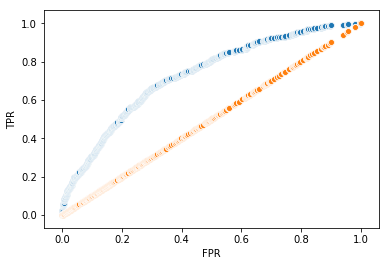

In [90]:
sns.scatterplot(fpr,tpr)
sns.scatterplot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

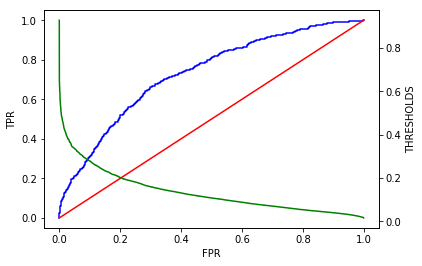

In [95]:
fig, ax = plt.subplots()
ax.plot(fpr,tpr,color = 'b')
ax.plot(fpr,fpr,color = 'r')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds,color = 'g')
ax1.set_ylabel('THRESHOLDS')
plt.show()

In [96]:
roc_df[(roc_df['tpr']<=0.81) & (roc_df['tpr']>=0.79)]

,fpr,tpr,thresholds
726,0.482481,0.790373,0.111843
727,0.484705,0.790373,0.111486
728,0.484705,0.791925,0.111467
729,0.486096,0.791925,0.111203
730,0.486096,0.793478,0.111156
731,0.486930,0.793478,0.111100
732,0.486930,0.796584,0.111017
733,0.488598,0.796584,0.110737
734,0.488598,0.798137,0.110650
735,0.491379,0.798137,0.110199
